In [1]:
### Let's build a convolutional neural network for the 3-label classification ###

In [2]:
# import modules
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from keras.layers import Activation, Conv3D, Dense, Flatten, MaxPool2D
from keras.models import Sequential

2023-01-12 22:00:04.537823: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-12 22:00:05.456722: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ricardo/Documents/MEB/AA/aaenv/lib/python3.8/site-packages/cv2/../../lib64:
2023-01-12 22:00:05.456804: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ricardo/Documents/MEB/AA/aaenv/lib/python3.8/si

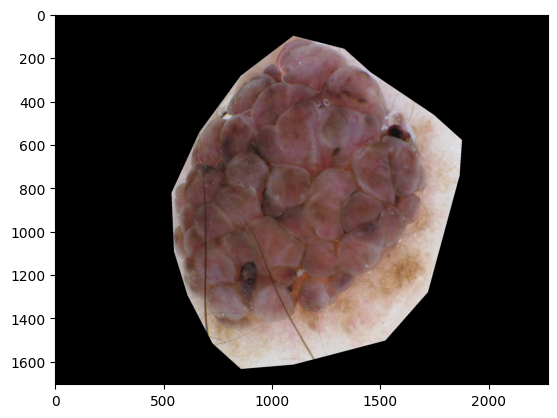

In [3]:


# Load training data csv. The original file contains the images names and patient data
training_data_csv = pd.read_csv('../merged_training_data.csv')
training_data_csv.head()

# Load an image and mask
img = cv.imread('../../ISIC-2017_Training_Data/ISIC_0000100.jpg',-1) 
mask = cv.imread('../../ISIC-2017_Training_Part1_GroundTruth/ISIC_0000100_segmentation.png',-1)

# Color conversion and normalization
output_array = np.zeros((img.shape[0],img.shape[1])) # Array to store normalized image
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) 

## Segmentation
segmented = cv.normalize(cv.bitwise_and(img, img, mask=mask),  output_array, 0, 255, cv.NORM_MINMAX)
plt.imshow(segmented);

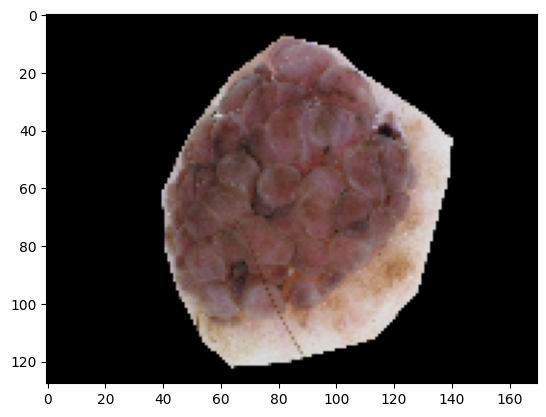

In [4]:
half = cv.resize(segmented, (0, 0), fx = 0.075, fy = 0.075)
plt.imshow(half)

In [5]:
### Segment, normalize and resize each image

import os 

im_path = '../../ISIC-2017_Training_Data/' ## CHANGE THIS VARIABLE WITH THE PATH WHERE YOU HAVE THE IMAGES
mask_path = '../../ISIC-2017_Training_Part1_GroundTruth/' ## CHANGE THIS VARIABLE WITH THE PATH WHERE THE MAKS ARE

## function to segment, normalize, resize and save images
for index, image in enumerate(training_data_csv['image_id']):
    # read
    img = cv.imread(im_path + image + '.jpg',-1) 
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    # segment
    mask = cv.imread(mask_path + image + '_segmentation.png', -1)    
    output_array = np.zeros((img.shape[0],img.shape[1])) # Array to store normalized image
    img_segmented = cv.normalize(cv.bitwise_and(img_rgb, img_rgb, mask=mask),  output_array, 0, 255, cv.NORM_MINMAX)
    cv.imwrite('../../segmented/SEG' + image + '.jpg' , img_segmented)
    print('segmented image ' + image + ' saved.' )